In [1]:
%matplotlib inline


In [ ]:
import tools
import layer
import nn
import matplotlib.pyplot as plt
import pandas as pd
import random

In [ ]:
data_size = 100

x = [[random.random() * 200.0 - 100] for i in range(data_size)]
y = [[x[i][0] * -3.2 + 5 + random.random() * 100 - 50] for i in range(data_size)]

In [ ]:
plt.scatter(x, y, c='g')
plt.show()

In [5]:
model = nn.Network([
    layer.Layer(1, 1)
], loss_function=tools.MeanSquaredError, optimizer=tools.Momentum)

In [6]:
prediction = list()

for feature in x:
    prediction.append(model.predict(feature)[0])

In [7]:
model.fit(x, y, epochs=10, learning_rate=0.00001)

Epoch 1/10, loss: [3664.527554027368]
Epoch 2/10, loss: [1006.4717841689727]
Epoch 3/10, loss: [1002.9061936345825]
Epoch 4/10, loss: [1001.3701268844758]
Epoch 5/10, loss: [999.873153444869]
Epoch 6/10, loss: [998.4288656733904]
Epoch 7/10, loss: [997.0354137295215]
Epoch 8/10, loss: [995.6911322226167]
Epoch 9/10, loss: [994.3944076269403]
Epoch 10/10, loss: [993.1436777192965]


In [8]:
# prediction of trained model
trained_prediction = list()

for feature in x:
    trained_prediction.append(model.predict(feature)[0])

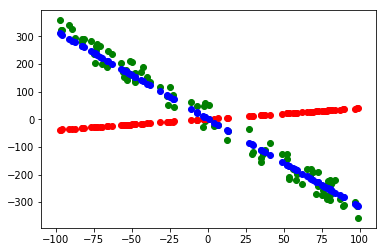

In [9]:
plt.scatter(x, y, c='g')
plt.scatter(x, prediction, c='r')
plt.scatter(x, trained_prediction, c='b')
plt.show()

In [10]:
import numpy as np

data = pd.read_csv("../data/train.csv")

data = data.iloc[np.random.permutation(len(data))]

# normalizing data
data_stats = data.describe().transpose()
data['rm'] = (data['rm'] - data_stats['min']['rm']) / (data_stats['max']['rm'] - data_stats['min']['rm'])
data['lstat'] = (data['lstat'] - data_stats['min']['lstat']) / (data_stats['max']['lstat'] - data_stats['min']['lstat'])
data['crim'] = (data['crim'] - data_stats['min']['crim']) / (data_stats['max']['crim'] - data_stats['min']['crim'])


In [11]:
boston_housing_model = nn.Network([
    layer.Layer(3, 4, activation=tools.Relu),
    layer.Layer(4, 1)
], loss_function=tools.MeanSquaredError, optimizer=tools.Momentum)


In [12]:
features = list()
labels = list()

for x1, x2, x3, y in zip(data['rm'], data['lstat'], data['crim'], data['medv']):
    features.append([x1, x2, x3])
    labels.append([y])

In [13]:
boston_housing_model.fit(features[:200], labels[:200], epochs=50, learning_rate=0.00005)
boston_housing_model.evaluate(features[200:], labels[200:])

Epoch 1/50, loss: [201.3992091920603]
Epoch 2/50, loss: [76.18095692519915]
Epoch 3/50, loss: [60.550132844152735]
Epoch 4/50, loss: [49.14361070524059]
Epoch 5/50, loss: [41.516206996912345]
Epoch 6/50, loss: [36.932402933185884]
Epoch 7/50, loss: [34.44087746789315]


Epoch 8/50, loss: [33.02850188111613]
Epoch 9/50, loss: [32.01651749221327]
Epoch 10/50, loss: [31.263077161271678]
Epoch 11/50, loss: [30.61242170459315]
Epoch 12/50, loss: [29.985057569029998]
Epoch 13/50, loss: [29.459376114427727]
Epoch 14/50, loss: [28.974560899500602]


Epoch 15/50, loss: [28.445476913626088]
Epoch 16/50, loss: [28.01706055672257]
Epoch 17/50, loss: [27.66352547577375]
Epoch 18/50, loss: [27.30003891285985]
Epoch 19/50, loss: [26.95739399597368]
Epoch 20/50, loss: [26.638140408434815]
Epoch 21/50, loss: [26.367329426967814]


Epoch 22/50, loss: [26.196877929070656]
Epoch 23/50, loss: [26.053199933992882]
Epoch 24/50, loss: [25.931438344552276]
Epoch 25/50, loss: [25.814148672100174]
Epoch 26/50, loss: [25.567280976531435]
Epoch 27/50, loss: [25.341316338356275]
Epoch 28/50, loss: [25.183318399655086]


Epoch 29/50, loss: [25.064009594577012]
Epoch 30/50, loss: [24.958823243626682]
Epoch 31/50, loss: [24.827293870261066]
Epoch 32/50, loss: [24.695223374250556]
Epoch 33/50, loss: [24.58957846536644]
Epoch 34/50, loss: [24.479518665916967]


Epoch 35/50, loss: [24.374360962042676]
Epoch 36/50, loss: [24.259908990781646]
Epoch 37/50, loss: [24.151431842803724]
Epoch 38/50, loss: [24.046363447578898]
Epoch 39/50, loss: [23.97189851282227]
Epoch 40/50, loss: [23.90993854581907]
Epoch 41/50, loss: [23.824510648713158]
Epoch 42/50, loss: [23.740652161219387]


Epoch 43/50, loss: [23.675594240614952]
Epoch 44/50, loss: [23.592741409441384]
Epoch 45/50, loss: [23.518531588885907]
Epoch 46/50, loss: [23.444323035436142]
Epoch 47/50, loss: [23.37079324947084]
Epoch 48/50, loss: [23.301797569476452]
Epoch 49/50, loss: [23.236645416677053]
Epoch 50/50, loss: [23.166776467825443]
Mean squared error: [18.925508330083247]


In [14]:
prediction = list()

for features_sample in features:
    prediction.append(boston_housing_model.predict(features_sample)[0])

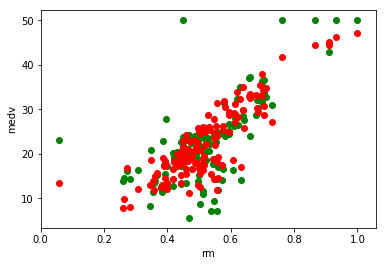

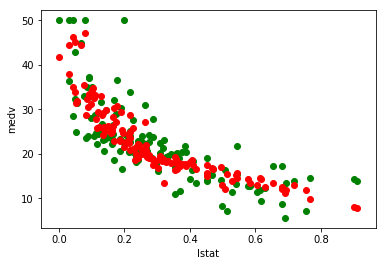

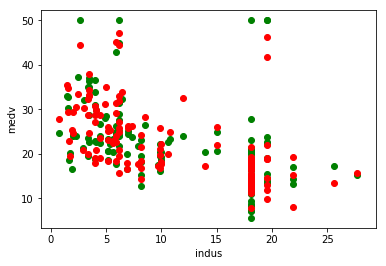

In [15]:
axes = plt.axes()
plt.scatter(data['rm'][200:], data['medv'][200:], c='g')
plt.scatter(data['rm'][200:], prediction[200:], c='r')
axes.set_ylabel("medv")
axes.set_xlabel('rm')
plt.show()

axes = plt.axes()
plt.scatter(data['lstat'][200:], data['medv'][200:], c='g')
plt.scatter(data['lstat'][200:], prediction[200:], c='r')
axes.set_ylabel("medv")
axes.set_xlabel('lstat')
plt.show()

axes = plt.axes()
plt.scatter(data['indus'][200:], data['medv'][200:], c='g')
plt.scatter(data['indus'][200:], prediction[200:], c='r')
axes.set_ylabel("medv")
axes.set_xlabel('indus')
plt.show()